# Visualize Decatur 2020 Tarspot Spread

Joshua A. Temple, CSS844 FS23, Module 3

This notebook takes the tarspot data for the Decatur 2020 experiment and visualizes tarspot incidence and severity over time.

This is just for presentation purposes.  Plant positional data is not included in the final analysis.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

In [2]:
# load the Decatur 2020 data
decatur2020_df = pd.read_csv('tarspot/Decatur2020_plotwise_tarspot.csv')
decatur2020_df.head()

Fullplot  Pass  Range  Rep  Plot  Field  Accession Genotype  Tar_Spot1  \
0  DC20_3001    25     11    1  3001  WiDiv   PI601377    NK794        0.0   
1  DC20_3002    26     11    1  3002  WiDiv   PI555660    LH214        0.0   
2  DC20_3003    27     11    1  3003  WiDiv  Ames27261    NC298        0.0   
3  DC20_3004    28     11    1  3004  WiDiv  Ames27170    NC348        0.0   
4  DC20_3005    29     11    1  3005  WiDiv   PI601469    PHR25        0.0   

   Tar_Spot2  ...  AUDPC_Spatial  Rate.1  Rate.2  Rate.3  Rate.4  Rate.5  \
0        0.1  ...          29.63    Emma  Sophia  Sophia  Sophia  Sophia   
1        0.1  ...          33.94  Sophia  Sophia  Sophia  Sophia  Sophia   
2        0.1  ...          17.86  Sophia  Sophia  Sophia  Sophia  Sophia   
3        0.1  ...          16.94  Sophia  Sophia  Sophia  Sophia  Sophia   
4        0.1  ...          54.33  Sophia  Sophia  Sophia  Sophia  Sophia   

   Rate.6  No.Rater.Adj.4  No.Rater.Adj.5  No.Rater.Adj.6  
0   Emily             0.8             0.8             2.5  
1   Emily             0.5             0.8             5.0  
2   Emily             0.3             0.5             2.0  
3   Emily             0.3             0.5             2.0  
4   Emily             0.8             2.5             5.0  

[5 rows x 32 columns]

In [3]:
# describe data to get min/max values for Pass/Range
decatur2020_df.describe()

Pass        Range          Rep         Plot    Tar_Spot1  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     20.647500    26.281667     1.500000  3803.917500     0.026417   
std      11.569131     8.783695     0.500208   530.226045     0.044107   
min       1.000000    11.000000     1.000000  3001.000000     0.000000   
25%      11.000000    19.000000     1.000000  3303.750000     0.000000   
50%      21.000000    26.000000     1.500000  3804.500000     0.000000   
75%      31.000000    34.000000     2.000000  4304.250000     0.100000   
max      40.000000    41.000000     2.000000  4608.000000     0.100000   

         Tar_Spot2    Tar_Spot3    Tar_Spot4    Tar_Spot5    Tar_Spot6  ...  \
count  1195.000000  1195.000000  1191.000000  1165.000000  1105.000000  ...   
mean      0.100251     0.298075     0.500588     1.889013     3.947421  ...   
std       0.102113     0.304854     0.506072     1.727710     3.900401  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.100000     0.100000     0.200000     1.000000     1.100000  ...   
50%       0.100000     0.200000     0.400000     1.300000     3.000000  ...   
75%       0.100000     0.300000     0.600000     2.500000     5.000000  ...   
max       1.000000     3.000000     8.900000    22.500000    37.900000  ...   

         Spatial.1    Spatial.2    Spatial.3    Spatial.4    Spatial.5  \
count  1200.000000  1195.000000  1195.000000  1191.000000  1165.000000   
mean      0.024458     0.093707     0.288008     0.467506     1.716567   
std       0.043644     0.099569     0.286817     0.448616     1.521332   
min      -0.050000    -0.130000    -0.480000    -1.250000    -3.360000   
25%      -0.010000     0.040000     0.130000     0.260000     0.940000   
50%       0.010000     0.100000     0.220000     0.420000     1.450000   
75%       0.070000     0.110000     0.375000     0.600000     2.230000   
max       0.120000     1.000000     2.820000     7.880000    20.470000   

         Spatial.6  AUDPC_Spatial  No.Rater.Adj.4  No.Rater.Adj.5  \
count  1105.000000    1096.000000     1191.000000     1163.000000   
mean      3.502443      30.222336        0.550378        1.650129   
std       3.464710      24.666325        0.537589        1.544252   
min      -7.680000     -61.690000        0.000000        0.000000   
25%       1.490000      16.780000        0.300000        0.800000   
50%       2.850000      26.250000        0.500000        1.200000   
75%       4.800000      39.572500        0.800000        2.000000   
max      33.720000     328.080000        9.000000       20.000000   

       No.Rater.Adj.6  
count     1105.000000  
mean         5.053213  
std          5.632631  
min          0.000000  
25%          1.500000  
50%          3.000000  
75%          7.000000  
max         60.000000  

[8 rows x 22 columns]

In [4]:
# show the columns to get the target column names
decatur2020_df.columns

Index(['Fullplot', 'Pass', 'Range', 'Rep', 'Plot', 'Field', 'Accession',
       'Genotype', 'Tar_Spot1', 'Tar_Spot2', 'Tar_Spot3', 'Tar_Spot4',
       'Tar_Spot5', 'Tar_Spot6', 'AUDPC', 'Spatial.Adj.AUDPC', 'Spatial.1',
       'Spatial.2', 'Spatial.3', 'Spatial.4', 'Spatial.5', 'Spatial.6',
       'AUDPC_Spatial', 'Rate.1', 'Rate.2', 'Rate.3', 'Rate.4', 'Rate.5',
       'Rate.6', 'No.Rater.Adj.4', 'No.Rater.Adj.5', 'No.Rater.Adj.6'],
      dtype='object')

In [5]:
# create list of tarspot columns
tarspot_cols = [
    'Tar_Spot1', 'Tar_Spot2', 'Tar_Spot3', 
    'Tar_Spot4', 'Tar_Spot5', 'Tar_Spot6'
    ]

# get max value of tarspot for final day to normalize plots
max_tarpot_val = decatur2020_df['Tar_Spot6'].max()
max_tarpot_val

37.9

1 40 11 41
(31, 40)


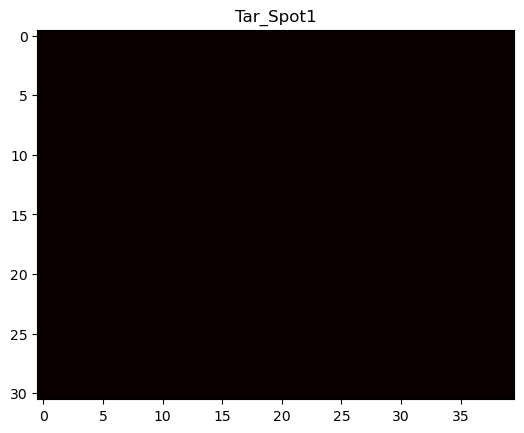

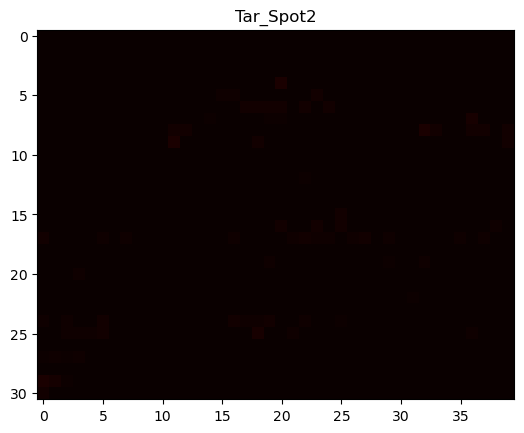

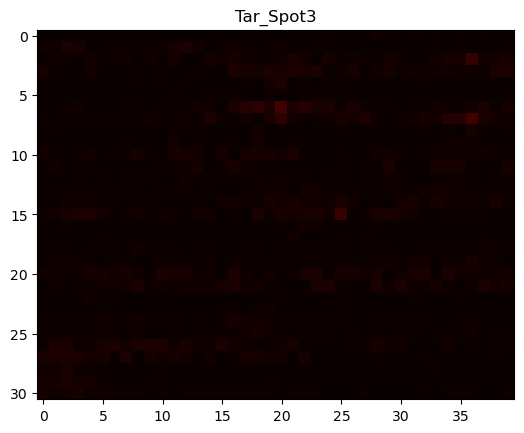

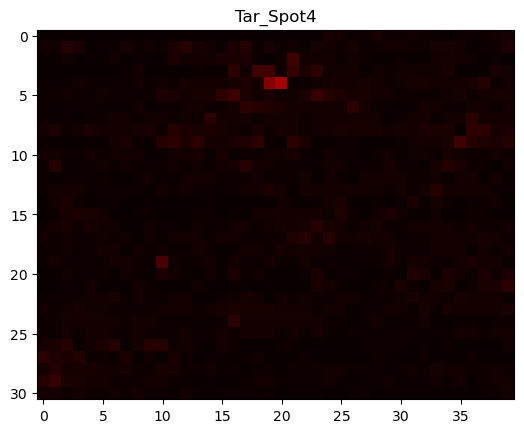

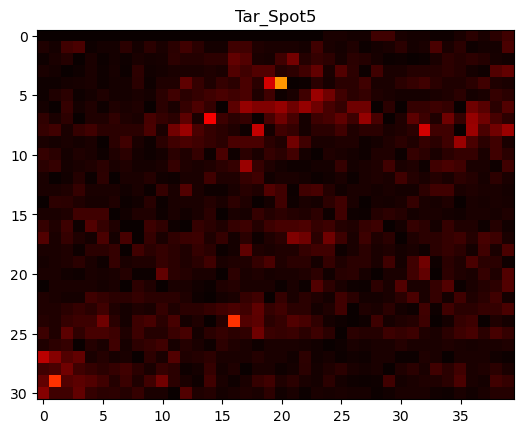

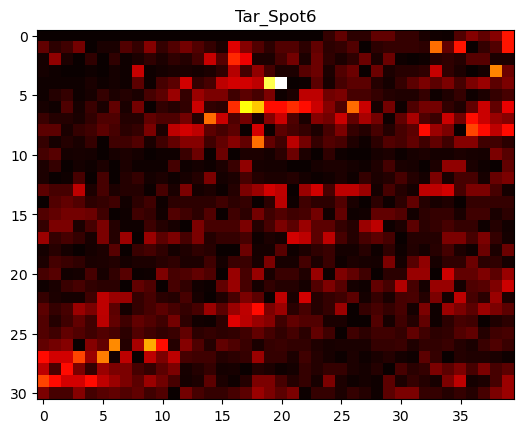

In [6]:
# This is a test cell to develop code to generate the animation

# get min/max values for pass and range
x_min = decatur2020_df['Pass'].min()
x_max = decatur2020_df['Pass'].max()
y_min = decatur2020_df['Range'].min()
y_max = decatur2020_df['Range'].max()

print(x_min, x_max, y_min, y_max)

# calculate the number of rows and columns
n_rows = y_max - y_min
n_cols = x_max - x_min

# create a 2D array of zeros
arr = np.zeros(shape=(n_rows+1, n_cols+1))
print(arr.shape)

ims = []


for i, tarspot_col in enumerate(tarspot_cols):

    # create a new figure for each day
    plt.figure()

    for j, row in decatur2020_df.iterrows():
        
        # get the x and y positions
        # subtract the min values to get the index for the array
        x_pos = row['Pass']
        x_index = x_pos - x_min
        y_pos = row['Range']
        y_index = y_pos - y_min
        tarspot = row[tarspot_col]

        # if the first iteration is nan, then set to 0
        if (np.isnan(tarspot)) & (i == 0):
            arr[y_index,x_index] = 0

        # if the tar spot value is nan, then keep previous value
        if np.isnan(tarspot):
            continue
        
        # otherwise set the value of the array to the tarspot value
        else:
            arr[y_index,x_index] = tarspot

    # append the image to the list of images
    ims.append([plt.imshow(arr, cmap='hot', vmin=0, vmax=max_tarpot_val, animated=True)])

    plt.imshow(arr, cmap='hot', vmin=0, vmax=max_tarpot_val)
    plt.title(tarspot_col)
    plt.show()

In [7]:
# create an empty list and array to store the data
ims = []
arr = np.zeros((y_max-y_min+1, x_max-x_min+1))

# create an image for each day
fig = plt.figure()

# iterate through each datapoint (day)
for i, tarspot_col in enumerate(tarspot_cols):

    gca = plt.gca()

    # iterate through each row
    for j, row in decatur2020_df.iterrows():
        
        # get the x and y positions
        # subtract the min values to get the index for the array
        x_pos = row['Pass']
        x_index = x_pos - x_min
        y_pos = row['Range']
        y_index = y_pos - y_min
        tarspot = row[tarspot_col]

        # if the first iteration is nan, then set to 0
        if (np.isnan(tarspot)) & (i == 0):
            arr[y_index,x_index] = 0

        # if the tar spot value is nan, then keep previous value
        if np.isnan(tarspot):
            continue
        
        # otherwise set the value of the array to the tarspot value
        else:
            arr[y_index,x_index] = tarspot

    # append the image to the list of images
    im = plt.imshow(arr, cmap='hot', vmin=0, vmax=max_tarpot_val, animated=True)
    
    # turn off the axis
    gca.xaxis.set_visible(False)    
    gca.yaxis.set_visible(False)
    
    # format and append the image to the list of images
    fig.tight_layout()
    ims.append([im])

# create the animation
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=0)

# save the animation
ani.save('tarspot_animation.gif', fps=1.5)

MovieWriter ffmpeg unavailable; using Pillow instead.
